In [2]:
# Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
sharks = pd.read_csv("sharks.csv")

In [4]:
sharks.head(3)

,Unnamed: 0,case_number,date,year,type,country,area,location,activity,name,age,injury,genero,fatal,fishing,surfing
0,0,2018.06.25,Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,57,"No injury to occupant, outrigger canoe and pad...",F,N,False,False
1,1,2018.06.18,Jun-2018,2018.0,Accidental,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,11,Minor injury to left thigh,F,N,False,False
2,2,2018.06.09,Jun-2018,2018.0,Injured/Fatal,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,48,Injury to left lower leg from surfboard skeg,M,N,False,True


In [5]:
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")

PAISES

In [6]:
sharks.country.value_counts()

NAN                      2451
USA                      2229
AUSTRALIA                1338
SOUTH AFRICA              579
PAPUA NEW GUINEA          134
                         ... 
DIEGO GARCIA                1
ARGENTINA                   1
THE BALKANS                 1
NORTH ATLANTIC OCEAN        1
CEYLON (SRI LANKA)          1
Name: country, Length: 206, dtype: int64

Como son demasiados países (206) cojo los 4 primeros para mi gráfica.

In [7]:
paises = sharks[(sharks.country == "USA") | (sharks.country == "AUSTRALIA")| (sharks.country == "SOUTH AFRICA")| (sharks.country == "PAPUA NEW GUINEA")]

In [8]:
paises.head(2)

,Unnamed: 0,case_number,date,year,type,country,area,location,activity,name,age,injury,genero,fatal,fishing,surfing
0,0,2018.06.25,Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,57,"No injury to occupant, outrigger canoe and pad...",F,N,False,False
1,1,2018.06.18,Jun-2018,2018.0,Accidental,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,11,Minor injury to left thigh,F,N,False,False


In [9]:
paises.country.value_counts()

USA                 2229
AUSTRALIA           1338
SOUTH AFRICA         579
PAPUA NEW GUINEA     134
Name: country, dtype: int64

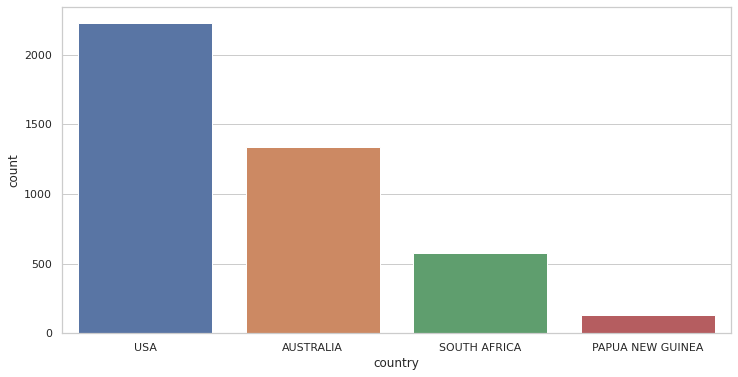

In [10]:
sns.countplot(x="country", data=paises);

TIPO de ACCIDENTES

In [11]:
sharks.type.value_counts()

Accidental       4595
Provoked          574
Injured/Fatal     547
Sea Disaster      239
Boating           203
Boat              138
Questionable        2
Name: type, dtype: int64

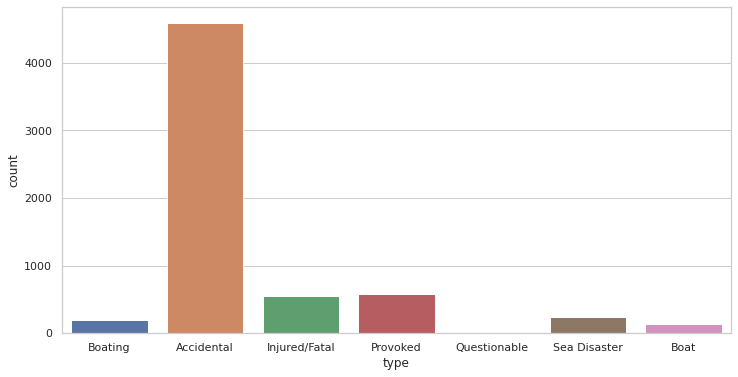

In [12]:
sns.countplot(x="type", data=sharks);

- Mueren más hombres que mujeres

In [14]:
muertos = sharks[((sharks.genero == "M") | (sharks.genero == "F")) & ((sharks.fatal == "Y") | (sharks.fatal == "N"))]

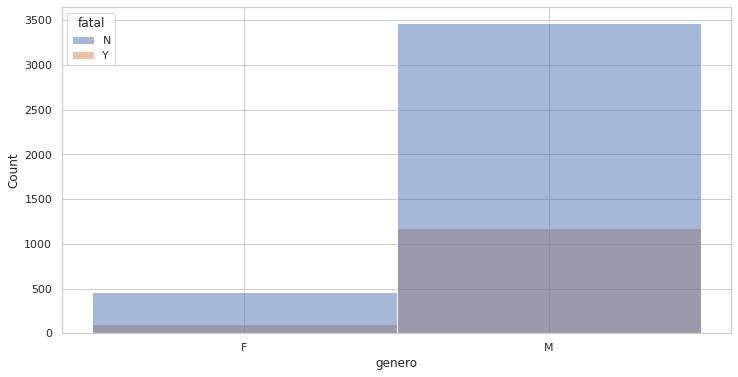

In [15]:
sns.histplot(data=muertos, x="genero", hue="fatal");

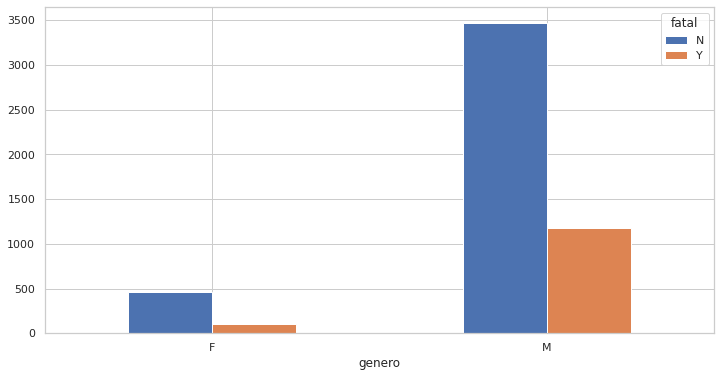

In [17]:
muertos.groupby(["genero", "fatal"])["fatal"].count().unstack().plot(kind="bar")
plt.xticks(rotation=0);